In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/spots_g.csv", usecols=[2,4,5,7])
df.head(10)

,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T
0,0,135.106,12.769,0
1,1,172.673,120.693,0
2,0,267.643,226.347,0
3,0,135.415,12.886,1
4,1,172.095,121.152,1
5,0,267.583,226.297,1
6,0,136.063,13.049,2
7,1,171.369,121.760,2
8,0,267.553,226.284,2
9,0,136.966,13.232,3


In [4]:
spots = df.values
print("Numer of spots:", len(spots)/3)

Numer of spots: 19960.666666666668


In [5]:
# separate the origin spots and arm spots
origin = []
arms = []

for spot in spots:
    # manually set the threshold to get all the origin spots
    if abs(spot[1] - 267) < 8 and abs(spot[2] - 226) < 8:
        origin.append(spot)
    else:
        arms.append(spot)
        
origin = [[spot[1], spot[2]] for spot in origin]
origin = np.array(origin)

# separate the top arm spots and bottom arm spots
top = np.zeros(origin.shape)
bottom = np.zeros(origin.shape)

# Have to manually match the TRACK_ID to either the top or bottom arm for each data set
for spot in arms:
    pos = int(spot[3])
    coord = [spot[1], spot[2]]    
    if spot[0] == 1:
        top[pos] = coord
    else:
        bottom[pos] = coord

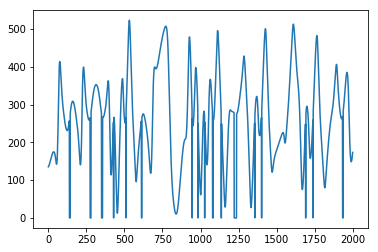

In [6]:
plt.plot(bottom[:2000,0])

In [7]:
# fill in the missing bottom arm spots
missing_indices = bottom == 0
# since the bottom arm spots are too close to the origin spots for ImageJ to differentiate, we assume they are the same
bottom[missing_indices] = origin[missing_indices]

-0.9472871289318996 -0.013145267531193383 -0.1235994395857199 -0.017352204619351892


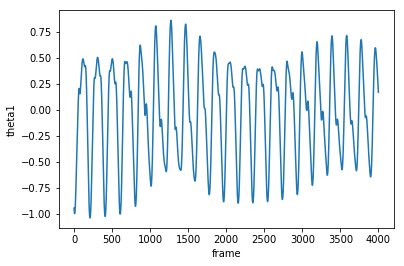

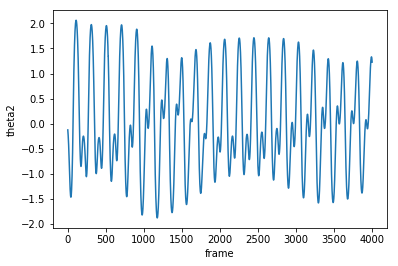

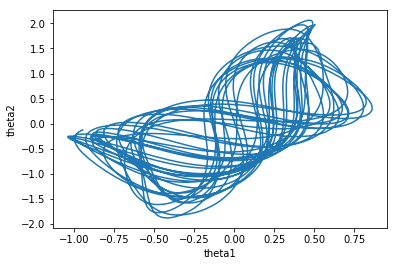

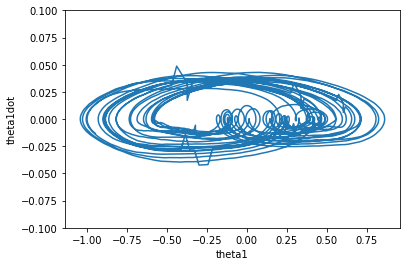

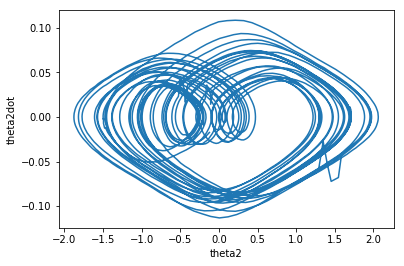

In [14]:
def coord2angle(x):
    slope = x[0] / x[1]
    base = np.arctan(slope)
    if x[0] >= 0 and x[1] >= 0:
        angle = base
    elif x[0] >= 0 and x[1] < 0:
        angle = base + np.pi
    elif x[0] < 0 and x[1] >= 0:
        angle = base
    else:
        angle = base - np.pi
    return angle

top_norm = top - origin
bottom_norm = bottom - top
theta1 = [coord2angle(coord) for coord in top_norm]
theta2 = [coord2angle(coord) for coord in bottom_norm]
theta1p = np.gradient(theta1)
theta2p = np.gradient(theta2)

a = 5000
b = 9000
plt.figure()
plt.xlabel("frame")
plt.ylabel("theta1")
plt.plot(theta1[a:b])

plt.figure()
plt.xlabel("frame")
plt.ylabel("theta2")
plt.plot(theta2[a:b])

plt.figure()
plt.xlabel("theta1")
plt.ylabel("theta2")
plt.plot(theta1[a:b], theta2[a:b])

plt.figure()
plt.ylim(-0.1,0.1)
plt.xlabel("theta1")
plt.ylabel("theta1dot")
plt.plot(theta1[a:b], theta1p[a:b])

plt.figure()
plt.xlabel("theta2")
plt.ylabel("theta2dot")
plt.plot(theta2[a:b], theta2p[a:b])

init = 5000
print(theta1[init], theta1p[init], theta2[init], theta2p[init])